C:\Users\USER\AppData\Local\Temp\ipykernel_22452\2738441249.py:8: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, data = wavfile.read('toujyo.wav')
C:\Users\USER\AppData\Local\Temp\ipykernel_22452\2738441249.py:18: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx))


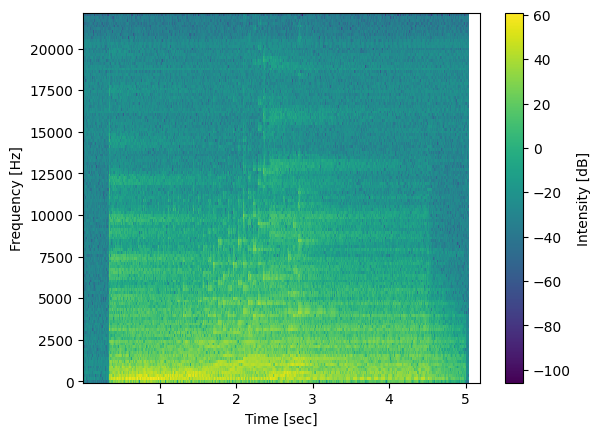

In [7]:
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram
import numpy as np 


# WAVファイルを読み込む
sample_rate, data = wavfile.read('toujyo.wav')

# ステレオデータの場合、モノラルに変換する
if len(data.shape) == 2:
    data = np.mean(data, axis=1)

# スペクトログラムを計算する
frequencies, times, Sxx = spectrogram(data, sample_rate)

# スペクトログラムを表示する
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.colorbar(label='Intensity [dB]')
plt.show()

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# 音楽ファイルを読み込む
y, sr = librosa.load('toujyo.wav', sr=None)

# 短時間フーリエ変換（STFT）を実行してスペクトログラムを計算
D = librosa.stft(y)

# スペクトログラム（複素数）を保存
np.save('spectrogram.npy', D)

# スペクトログラムの振幅を取得し、デシベル単位に変換
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# スペクトログラムをプロット
plt.figure(figsize=(12, 8))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.savefig('spectrogram.png')  # スペクトログラムの画像として保存
plt.close()

In [ ]:
import numpy as np
import librosa
import soundfile as sf

# スペクトログラムを読み込む
D = np.load('spectrogram.npy')

# 逆短時間フーリエ変換を実行して音楽データを再構築
y_reconstructed = librosa.istft(D)

# 再構築した音楽データをWAVファイルとして保存
sf.write('reconstructed_music_file.wav', y_reconstructed, sr)

In [ ]:
import numpy as np
import binascii
import json

# NumPy 配列を読み込む
D = np.load('spectrogram.npy')

# 配列の dtype と shape を取得
dtype = str(D.dtype)
shape = D.shape

# 配列をバイト列に変換
bytes_data = D.tobytes()

# バイト列をヘキサデシマルの文字列に変換
hex_str = binascii.hexlify(bytes_data).decode('utf-8')

# dtype と shape を保存
metadata = {'dtype': dtype, 'shape': shape}
with open('spectrogram_metadata.json', 'w') as file:
    json.dump(metadata, file)

# ヘキサデシマルの文字列をテキストファイルに保存
with open('spectrogram_hex.txt', 'w') as file:
    file.write(hex_str)

In [ ]:
import numpy as np
import binascii
import json

# ヘキサデシマルの文字列を含むテキストファイルを読み込む
with open('spectrogram_hex.txt', 'r') as file:
    hex_str = file.read()

# dtype と shape のメタデータを読み込む
with open('spectrogram_metadata.json', 'r') as file:
    metadata = json.load(file)
    dtype = metadata['dtype']
    shape = tuple(metadata['shape'])

# ヘキサ文字列をバイナリデータに変換
bytes_data = binascii.unhexlify(hex_str)

# バイナリデータをNumPy配列に変換
D_reconstructed = np.frombuffer(bytes_data, dtype=dtype).reshape(shape)

# 復元されたNumPy配列をファイルに保存
np.save('reconstructed_spectrogram.npy', D_reconstructed)

In [ ]:
import numpy as np
import librosa
import soundfile as sf

# スペクトログラムを読み込む
D = np.load('spectrogram.npy')

# 逆短時間フーリエ変換を実行して音楽データを再構築
y_reconstructed = librosa.istft(D)

# 再構築した音楽データをWAVファイルとして保存
sf.write('reconstructed_music_file.wav', y_reconstructed, sr)